<h2 style="color:blue" align="left"> Predict Loan Eligibility for Dream Housing Finance company </h2>

# Loan Prediction

## Problem 

- A **Company wants to automate the loan eligibility process (real time)** based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to **identify the customers segments,** those are **eligible for loan amount** so that they can **specifically target these customers.** Here they have provided a data set.

## Data

- Variable Descriptions:


- **Train file:** CSV containing the customers for whom loan eligibility is known as 'Loan_Status'


| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Loan_ID           	| Unique Loan ID                                 	|
| Gender            	| Male/ Female                                   	|
| Married           	| Applicant married (Y/N)                        	|
| Dependents        	| Number of dependents                           	|
| Education         	| Applicant Education (Graduate/ Under Graduate) 	|
| Self_Employed     	| Self employed (Y/N)                            	|
| ApplicantIncome   	| Applicant income                               	|
| CoapplicantIncome 	| Coapplicant income                             	|
| LoanAmount        	| Loan amount in thousands                       	|
| Loan_Amount_Term  	| Term of loan in months                         	|
| Credit_History    	| credit history meets guidelines                	|
| Property_Area     	| Urban/ Semi Urban/ Rural                       	|
| Loan_Status       	| Loan approved (Y/N)                            	|


- **Test file:** CSV containing the customer information for whom loan eligibility is to be predicted

| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Loan_ID           	| Unique Loan ID                                 	|
| Gender            	| Male/ Female                                   	|
| Married           	| Applicant married (Y/N)                        	|
| Dependents        	| Number of dependents                           	|
| Education         	| Applicant Education (Graduate/ Under Graduate) 	|
| Self_Employed     	| Self employed (Y/N)                            	|
| ApplicantIncome   	| Applicant income                               	|
| CoapplicantIncome 	| Coapplicant income                             	|
| LoanAmount        	| Loan amount in thousands                       	|
| Loan_Amount_Term  	| Term of loan in months                         	|
| Credit_History    	| credit history meets guidelines                	|
| Property_Area     	| Urban/ Semi Urban/ Rural                       	|


- **Submission file format**

| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Loan_ID           	| Unique Loan ID                                 	|
| Loan_Status         	| (Target) Loan approved (Y/N)                     	|
| Married           	| Applicant married (Y/N)                        	|
| Dependents        	| Number of dependents                           	|

- Rows: 614, 13
- Source: Datahack


### Credit_History 
    1 : applicants have repaid their debts
    
    0 : applicants have not paid their debts

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [1]:
# Read data
import numpy as np                           # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                          # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt              # Visualization using matplotlib
%matplotlib inline
import seaborn as sns                        # Visualization using seaborn

# style
plt.style.use("fivethirtyeight")             # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")                    # Set Graphs Background style using seaborn


# ML model building; Pre Processing & Evaluation
from sklearn.model_selection import train_test_split                     # split  data into training and testing sets
from sklearn.linear_model import LogisticRegression                      # LogisticRegression
from sklearn.tree import DecisionTreeClassifier                          # Decision tree Classifier
from sklearn.ensemble import RandomForestClassifier                      # this will make a Random Forest Classifier
import xgboost
from xgboost import XGBClassifier                                        # XGBoost Classifier
from sklearn.preprocessing import StandardScaler                         # Standard Scalar
from sklearn.metrics import confusion_matrix, classification_report      # this creates a confusion matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV     # this will do cross validation

import warnings                              # To ignore any warnings
warnings.filterwarnings("ignore")

C:\Users\deepusuresh\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\deepusuresh\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\deepusuresh\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


<h2 style="color:blue" align="left"> 2. Load data </h2>

In [2]:
# Read train and test dataset
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

In [3]:
# Import first 5 rows
display(train.head())
display(test.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
# checking dimension (num of rows and columns) of dataset
print("Training data shape (Rows, Columns):",train.shape)
print("Test data shape (Rows, Columns):",test.shape)

Training data shape (Rows, Columns): (614, 13)
Test data shape (Rows, Columns): (367, 12)


In [5]:
train_original=train.copy() 
test_original=test.copy()

In [6]:
# check dataframe structure like columns and its counts, datatypes & Null Values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# check dataframe structure like columns and its counts, datatypes & Null Values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
train.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

- Train dataset features consists of three datatypes
     1. float
     2. integer
     3. object
- Total numerical features are 5
- Total categorical features are 8

In [9]:
test.dtypes.value_counts()

object     7
float64    3
int64      2
dtype: int64

- Train dataset features consists of three datatypes
     1. float
     2. integer
     3. object
- Total numerical features are 5
- Total categorical features are 7

In [10]:
# Gives number of data points in each variable
train.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [11]:
# Gives number of data points in each variable
test.count()

Loan_ID              367
Gender               356
Married              367
Dependents           357
Education            367
Self_Employed        344
ApplicantIncome      367
CoapplicantIncome    367
LoanAmount           362
Loan_Amount_Term     361
Credit_History       338
Property_Area        367
dtype: int64

<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

- EDA is a way of **Visualizing, Summarizing and interpreting** the information that is **hidden in rows and column** format.

### 1. Find Unwanted Columns
- There is one unwanted column present in given dataset to remove.

EX: Loan_ID

In [12]:
train = train.drop('Loan_ID',axis=1) 
test = test.drop('Loan_ID',axis=1)

### 2. Train & Test : Numerical and Categorical Features
### Train Dataset
#### a. Numeric Features

In [13]:
numeric_cols_train = train.select_dtypes(include=[np.number])
display(numeric_cols_train.head())
print('\n')
numeric_cols_train.columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [14]:
numeric_cols_train.shape

(614, 5)

#### b. Categorical Features

In [15]:
categorical_cols_train = train.select_dtypes(include=[np.object])
display(categorical_cols_train.head())
print('\n')
categorical_cols_train.columns

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
categorical_cols_train.shape

(614, 7)

### Test Dataset
#### a. Numeric Features

In [17]:
numeric_cols_test = test.select_dtypes(include=[np.number])
display(numeric_cols_test.head())
print('\n')
numeric_cols_test.columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,NaN
4,3276,0,78.0,360.0,1.0


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [18]:
numeric_cols_test.shape

(367, 5)

#### b. Categorical Features

In [19]:
categorical_cols_test = test.select_dtypes(include=[np.object])
display(categorical_cols_test.head())
print('\n')
categorical_cols_test.columns

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [20]:
categorical_cols_test.shape

(367, 6)

### 3. Train & Test : Checking the value count for "Categorical variables"

### Dependents

In [21]:
display("Train : Value counts of Dependents:",train.Dependents.value_counts())
display("Test : Value counts of Dependents:",test.Dependents.value_counts())

'Train : Value counts of Dependents:'

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

'Test : Value counts of Dependents:'

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [22]:
train['Dependents'] = train['Dependents'].replace("3+",3)
test['Dependents'] = test['Dependents'].replace("3+",3)

In [23]:
display("Train : Value counts of Dependents:",train.Dependents.value_counts())
display("Test : Value counts of Dependents:",test.Dependents.value_counts())

'Train : Value counts of Dependents:'

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

'Test : Value counts of Dependents:'

0    200
2     59
1     58
3     40
Name: Dependents, dtype: int64

### 4. Find Missing Values

- Checking missing values by below methods:

     1. df.isnull().sum()
        - It returns null values for each column
          
     2. isnull().any()
        - It returns True if column have NULL Values
        - It returns False if column don't have NULL Values
          
     3. Heatmap()
        - Missing value representation using heatmap.
          
     4. Percentage of Missing values

In [144]:
# Listing Number of missing values by feature column wise
train_missing = train.isnull().sum().sort_values(ascending=False)
train_missing = train_missing[train_missing > 0]
train_missing

Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64

In [145]:
# Listing Number of missing values by feature column wise
test_missing = test.isnull().sum().sort_values(ascending=False)
test_missing = test_missing[test_missing > 0]
test_missing

Credit_History      29
Self_Employed       23
Gender              11
Dependents          10
Loan_Amount_Term     6
LoanAmount           5
dtype: int64

In [146]:
# any() check null values by columns
train.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [147]:
# any() check null values by columns
test.isnull().any()

Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

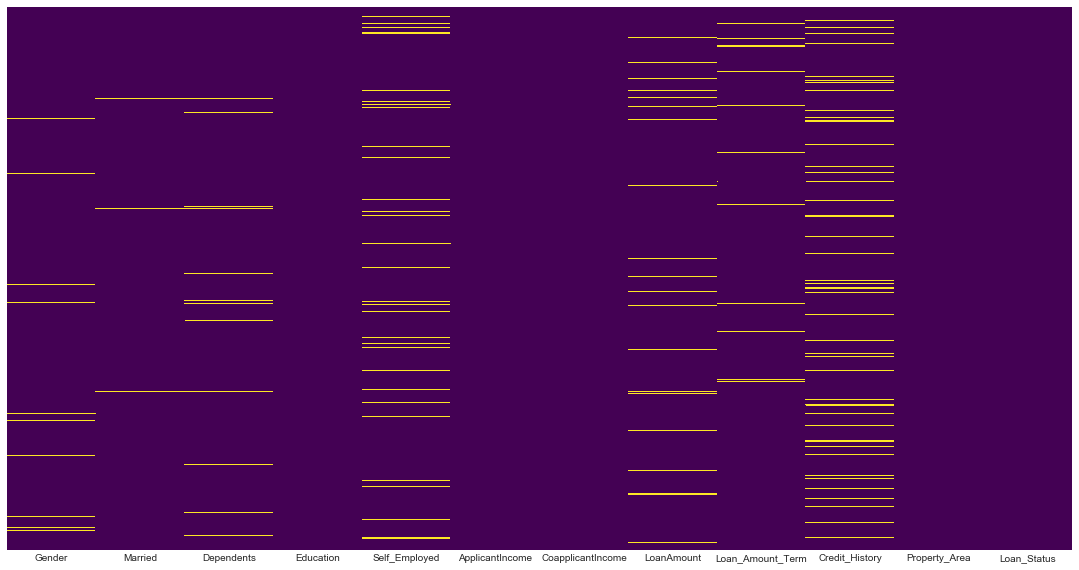

In [28]:
plt.figure(figsize=(17,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

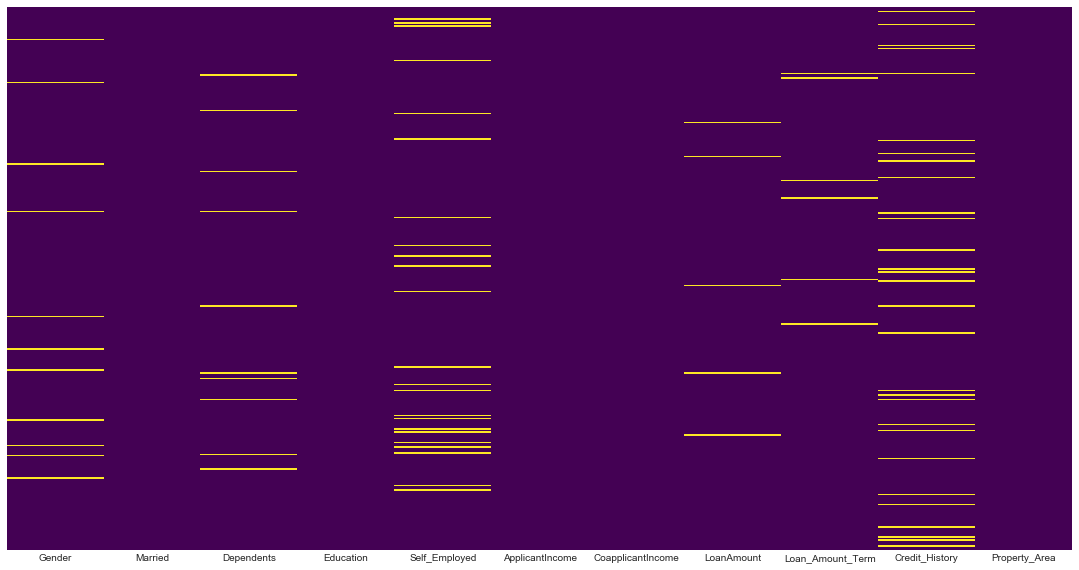

In [29]:
plt.figure(figsize=(17,10))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [30]:
# Percentage of Missing values in train dataset
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric cols'

missing_data.head(8)

,Total Missing Count,% of Total Observations
Numeric cols,,
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_Status,0,0.000000


In [31]:
# Percentage of Missing values in train dataset
total = test.isnull().sum().sort_values(ascending=False)
percent = ((test.isnull().sum()/test.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric cols'

missing_data.head(7)

,Total Missing Count,% of Total Observations
Numeric cols,,
Credit_History,29,7.901907
Self_Employed,23,6.267030
Gender,11,2.997275
Dependents,10,2.724796
Loan_Amount_Term,6,1.634877
LoanAmount,5,1.362398
Property_Area,0,0.000000


### Loan_Status

In [24]:
display("Train : Value counts of Loan_Status:",train.Loan_Status.value_counts())

'Train : Value counts of Loan_Status:'

Y    422
N    192
Name: Loan_Status, dtype: int64

In [25]:
train.Loan_Status = train.Loan_Status.map({'Y':1, "N":0})

In [26]:
display("Train : Value counts of Loan_Status:",train.Loan_Status.value_counts())

'Train : Value counts of Loan_Status:'

1    422
0    192
Name: Loan_Status, dtype: int64

### Married

In [27]:
display("Train : Value counts of Married:",train.Married.value_counts())
display("Test : Value counts of Married:",test.Married.value_counts())

'Train : Value counts of Married:'

Yes    398
No     213
Name: Married, dtype: int64

'Test : Value counts of Married:'

Yes    233
No     134
Name: Married, dtype: int64

In [28]:
train.Married = train.Married.map({'Yes':1, 'No':0})
test.Married = test.Married.map({'Yes':1, 'No':0})

In [29]:
display("Train : Value counts of Married:",train.Married.value_counts())
display("Test : Value counts of Married:",test.Married.value_counts())

'Train : Value counts of Married:'

1.0    398
0.0    213
Name: Married, dtype: int64

'Test : Value counts of Married:'

1    233
0    134
Name: Married, dtype: int64

### Education

In [30]:
display("Train : Value counts of Education:",train.Education.value_counts())
display("Test : Value counts of Education:",test.Education.value_counts())

'Train : Value counts of Education:'

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

'Test : Value counts of Education:'

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [31]:
train.Education = train.Education.map({'Graduate':1, 'Not Graduate':0})
test.Education = test.Education.map({'Graduate':1, 'Not Graduate':0})

In [32]:
display("Train : Value counts of Education:",train.Education.value_counts())
display("Test : Value counts of Education:",test.Education.value_counts())

'Train : Value counts of Education:'

1    480
0    134
Name: Education, dtype: int64

'Test : Value counts of Education:'

1    283
0     84
Name: Education, dtype: int64

### Property_Area

In [33]:
display("Train : Value counts of Property_Area:",train.Property_Area.value_counts())
display("Test : Value counts of Property_Area:",test.Property_Area.value_counts())

'Train : Value counts of Property_Area:'

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

'Test : Value counts of Property_Area:'

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [34]:
train.Property_Area = train.Property_Area.map({'Rural':0, 'Semiurban':1, 'Urban':2})
test.Property_Area = test.Property_Area.map({'Rural':0, 'Semiurban':1, 'Urban':2})

In [35]:
display("Train : Value counts of Property_Area:",train.Property_Area.value_counts())
display("Test : Value counts of Property_Area:",test.Property_Area.value_counts())

'Train : Value counts of Property_Area:'

1    233
2    202
0    179
Name: Property_Area, dtype: int64

'Test : Value counts of Property_Area:'

2    140
1    116
0    111
Name: Property_Area, dtype: int64

### Gender

In [36]:
display("Train : Value counts of Gender:",train.Gender.value_counts())
display("Test : Value counts of Gender:",test.Gender.value_counts())

'Train : Value counts of Gender:'

Male      489
Female    112
Name: Gender, dtype: int64

'Test : Value counts of Gender:'

Male      286
Female     70
Name: Gender, dtype: int64

In [37]:
train.Gender = train.Gender.map({'Male':1, 'Female':0})
test.Gender = test.Gender.map({'Male':1, 'Female':0})

In [38]:
display("Train : Value counts of Property_Area:",train.Gender.value_counts())
display("Test : Value counts of Property_Area:",test.Gender.value_counts())

'Train : Value counts of Property_Area:'

1.0    489
0.0    112
Name: Gender, dtype: int64

'Test : Value counts of Property_Area:'

1.0    286
0.0     70
Name: Gender, dtype: int64

### Dependents

In [39]:
display("Train : Value counts of Dependents:",train.Dependents.value_counts())
display("Test : Value counts of Dependents:",test.Dependents.value_counts())

'Train : Value counts of Dependents:'

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

'Test : Value counts of Dependents:'

0    200
2     59
1     58
3     40
Name: Dependents, dtype: int64

- For **"Dependents"** feature, **missing values** can not fill by **"mean"** because no of feature variables are in big difference.


- Best method to fill missing values is by **"Mode"**. ie 0 ---> 345

In [40]:
# replace all missing values by "0"
train['Dependents'] = train['Dependents'].replace(np.nan,0)
test['Dependents'] = test['Dependents'].replace(np.nan,0)

In [41]:
display(train['Dependents'].isnull().sum())
display(test['Dependents'].isnull().sum())

0

0

In [42]:
display("Train : Value counts of Dependents:",train.Dependents.value_counts())
display("Test : Value counts of Dependents:",test.Dependents.value_counts())

'Train : Value counts of Dependents:'

0    345
1    102
2    101
3     51
0     15
Name: Dependents, dtype: int64

'Test : Value counts of Dependents:'

0    200
2     59
1     58
3     40
0     10
Name: Dependents, dtype: int64

### Self_Employed

In [43]:
display("Train : Value counts of Self_Employed:",train.Self_Employed.value_counts())
display("Test : Value counts of Self_Employed:",test.Self_Employed.value_counts())

'Train : Value counts of Self_Employed:'

No     500
Yes     82
Name: Self_Employed, dtype: int64

'Test : Value counts of Self_Employed:'

No     307
Yes     37
Name: Self_Employed, dtype: int64

- For **"Self_Employed"** feature, **missing values** can not fill by **"mean"** because no of feature variables are in big difference.


- Best method to fill missing values is by **"Mode"**. ie 0 ---> 500

In [44]:
train.Self_Employed = train.Self_Employed.map({'Yes':1, 'No':0})
test.Self_Employed = test.Self_Employed.map({'Yes':1, 'No':0})

In [45]:
display("Train : Value counts of Self_Employed:",train.Self_Employed.value_counts())
display("Test : Value counts of Self_Employed:",test.Self_Employed.value_counts())

'Train : Value counts of Self_Employed:'

0.0    500
1.0     82
Name: Self_Employed, dtype: int64

'Test : Value counts of Self_Employed:'

0.0    307
1.0     37
Name: Self_Employed, dtype: int64

In [46]:
train['Self_Employed'] = train['Self_Employed'].replace(np.nan,0)
test['Self_Employed'] = test['Self_Employed'].replace(np.nan,0)

In [47]:
display("Train : Value counts of Self_Employed:",train.Self_Employed.value_counts())
display("Test : Value counts of Self_Employed:",test.Self_Employed.value_counts())

'Train : Value counts of Self_Employed:'

0.0    532
1.0     82
Name: Self_Employed, dtype: int64

'Test : Value counts of Self_Employed:'

0.0    330
1.0     37
Name: Self_Employed, dtype: int64

### Loan Amount

In [48]:
display("Train : Value counts of Self_Employed:",train.LoanAmount.value_counts())
display("Test : Value counts of Self_Employed:",test.LoanAmount.value_counts())

'Train : Value counts of Self_Employed:'

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

'Test : Value counts of Self_Employed:'

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
186.0     1
163.0     1
360.0     1
77.0      1
297.0     1
Name: LoanAmount, Length: 144, dtype: int64

- Now we will see the **LoanAmount** variable. As it is a **numerical variable,** we can use **mean or median** to impute the missing values.


- We will use **median** to fill the null values as earlier we saw that **loan amount** have **outliers** so the **mean will not be the proper approach** as it is **highly affected by the presence of outliers.**

In [49]:
train['LoanAmount'] = train['LoanAmount'].replace(np.nan,train['LoanAmount'].median())
test['LoanAmount'] = test['LoanAmount'].replace(np.nan,train['LoanAmount'].median())

In [50]:
train['LoanAmount'].isnull().sum()

0

### Loan_Amount_Term

In [51]:
display("Train : Value counts of Self_Employed:",train.Loan_Amount_Term.value_counts())
display("Test : Value counts of Self_Employed:",test.Loan_Amount_Term.value_counts())

'Train : Value counts of Self_Employed:'

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

'Test : Value counts of Self_Employed:'

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [52]:
# missing values filled by most occuring value of 360
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].replace(np.nan,360)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].replace(np.nan,360)

In [53]:
train['Loan_Amount_Term'].isnull().sum()

0

In [54]:
# train data
    
      # Numeric Features
        
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())              # float
    
      # Categorical Features
        
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])

# test data
    
      # Numeric Featurestrain
        
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())                # float
        
      # Categorical Features
        
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])

In [164]:
display(train.isnull().sum())
display(test.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [55]:
# Import first 5 rows
display(train.head())
display(test.head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,2,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0,1,0.0,5720,0,110.0,360.0,1.000000,2
1,1.0,1,1,1,0.0,3076,1500,126.0,360.0,1.000000,2
2,1.0,1,2,1,0.0,5000,1800,208.0,360.0,1.000000,2
3,1.0,1,2,1,0.0,2340,2546,100.0,360.0,0.825444,2
4,1.0,0,0,0,0.0,3276,0,78.0,360.0,1.000000,2


### 5. Find Features with one value

In [48]:
for column in train.columns:
    print(column,train[column].nunique())

Gender 2
Married 2
Dependents 5
Education 2
Self_Employed 3
ApplicantIncome 505
CoapplicantIncome 287
LoanAmount 203
Loan_Amount_Term 10
Credit_History 3
Property_Area 3
Loan_Status 2


### 6. Explore the Categorical Features

In [49]:
categorical_features = [feature for feature in train.columns if train[feature].dtypes=='O']
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [50]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))

The feature is Gender and number of categories are 2
The feature is Married and number of categories are 2
The feature is Dependents and number of categories are 5
The feature is Education and number of categories are 2
The feature is Self_Employed and number of categories are 3
The feature is Property_Area and number of categories are 3
The feature is Loan_Status and number of categories are 2


#### 7. Find Categorical Feature Distribution

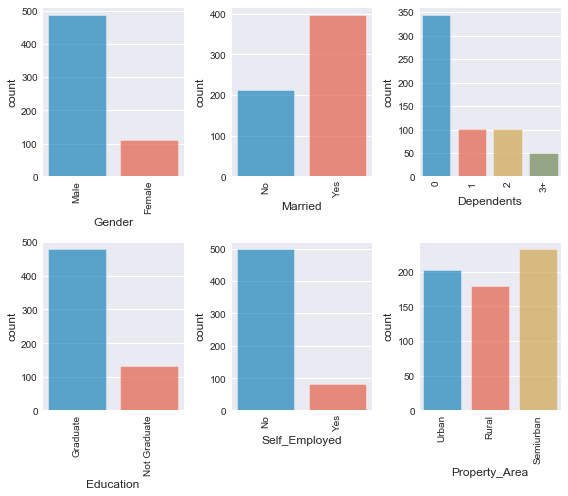

In [51]:
fig, axes = plt.subplots(round(len(categorical_cols_train.columns) / 3), 3, figsize=(8, 7))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_cols_train.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=categorical_cols_train.columns[i], alpha=0.7, data=categorical_cols_train, ax=ax)

fig.tight_layout()

### 10. Explore the Numerical Features

In [52]:
numerical_features = train.select_dtypes(exclude='object')
numerical_features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


### 11. Find Discrete Numerical Features

In [53]:
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


### 12. Find Continous Numerical Features

In [54]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['target']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 3


In [55]:
continuous_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

### 13. Distribution of Continous Numerical Features

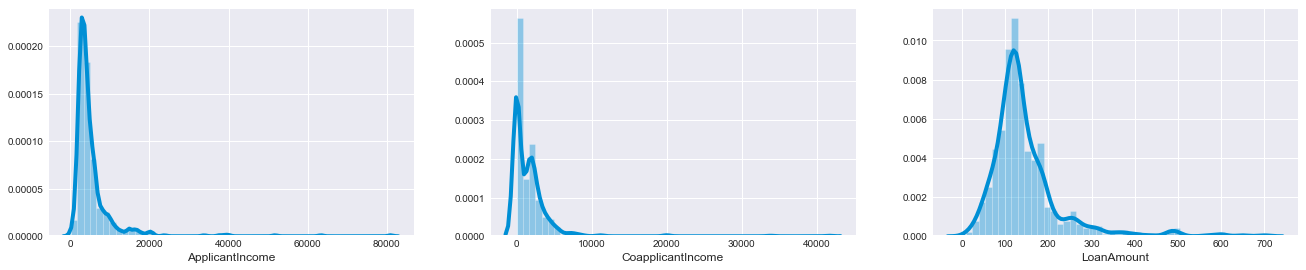

In [56]:
# plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(train[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

### 14. Relation between Continous numerical Features and Labels

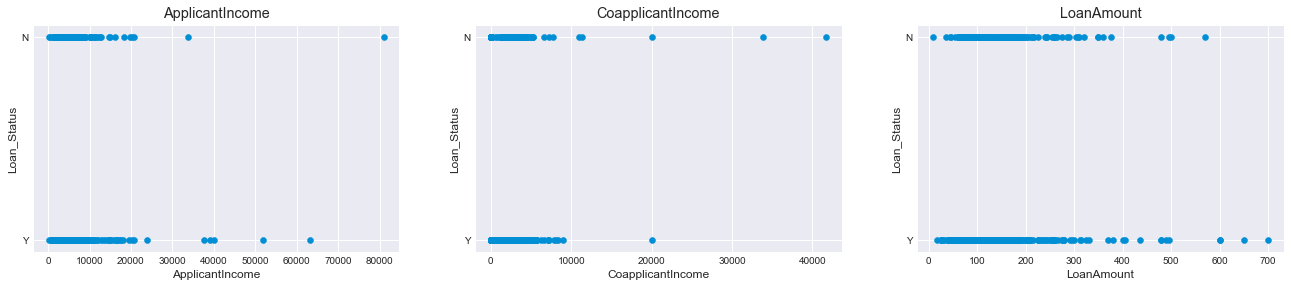

In [57]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=train.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(train[feature],train['Loan_Status'])
    plt.xlabel(feature)
    plt.ylabel('Loan_Status')
    plt.title(feature)
    plotnumber+=1
plt.show()

### 15. Find Outliers in numerical features

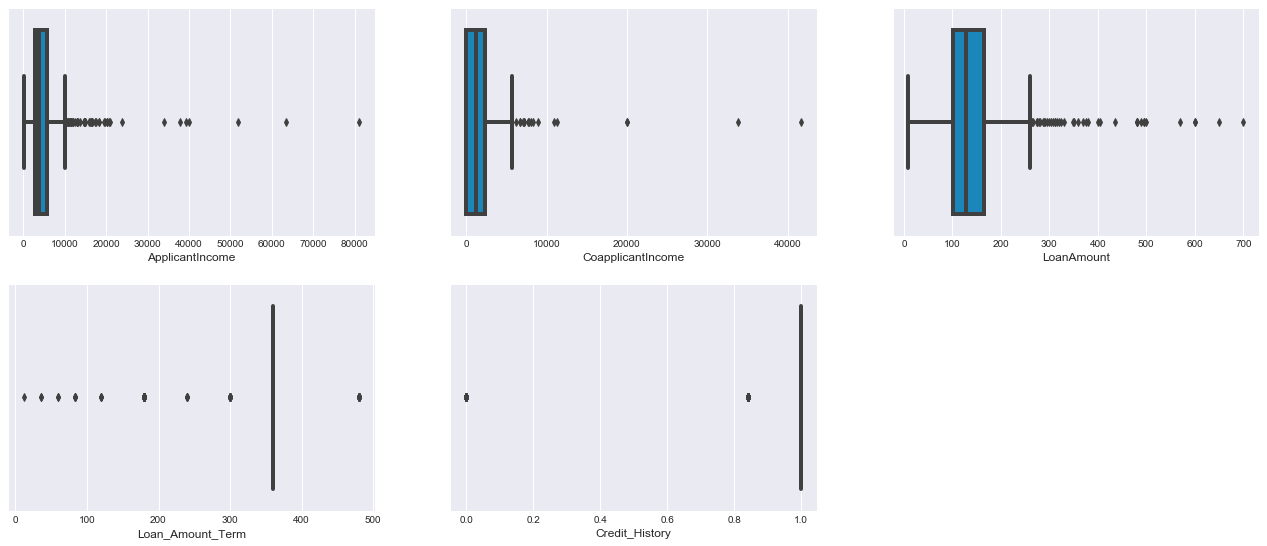

In [58]:
# boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(train[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

### 16. Explore the Correlation between numerical features

In [59]:
## Checking for correlation
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.007031
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.003546
Credit_History,-0.014477,-0.001665,-0.007031,-0.003546,1.000000


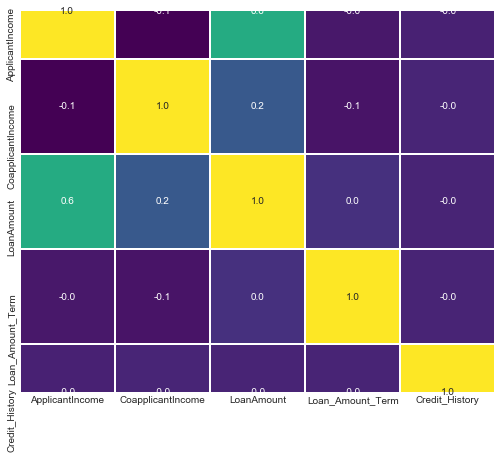

In [60]:
## Checking for correlation
cor_mat=train.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat, annot=True, cbar=False, cmap='viridis', fmt='.1f', linewidth=1, square=True)
plt.show()

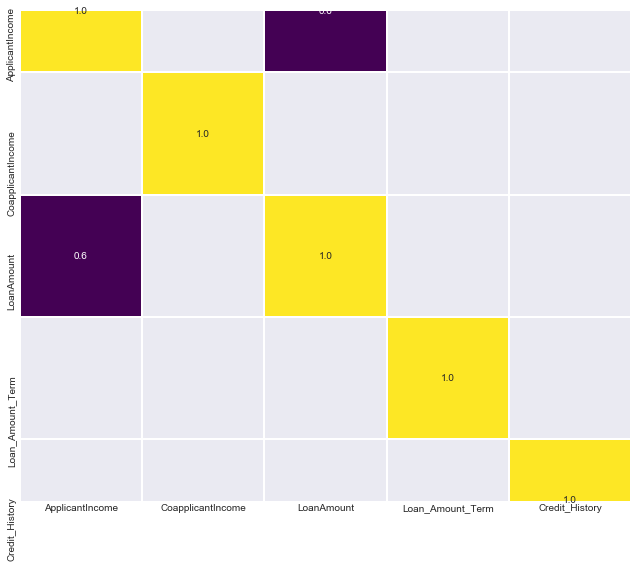

In [61]:
# highlight only features have correlation between 0.5 and -0.3
plt.figure(figsize=(10,9))
corr = train.corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.3)], annot=True, cbar=False,
                                 cmap='viridis', linewidth=1, fmt='.1f', square=True)

### 17. Descriptive statistics

In [62]:
# descriptive statistics (numerical columns)
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.842199
std,6109.041673,2926.248369,84.107233,64.428629,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<h2 style="color:green" align="left"> 5. Data Visualization </h2>

- Used below **visualisation libraries**

     1. Matplotlib
     2. Seaborn (statistical data visualization)
     
### 1. Categorical

- Categorical data :

     1. Numerical Summaries
     2. Histograms
     3. Pie Charts


### 2. Univariate Analysis

- Univariate Analysis : data consists of **only one variable (only x value)**.

     1. Line Plots / Bar Charts
     2. Histograms
     3. Box Plots 
     4. Count Plots
     5. Descriptive Statistics techniques
     6. Violin Plot

### Skewness

#### Train Data

In [166]:
numeric_cols_train.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

- **"ApplicantIncome", "CoapplicantIncome", "LoanAmount"** are **positive(right) skewed.**


- **"Loan_Amount_Term", "Credit_History"** are **Negitive(left) skewed.**

### Loan_Status

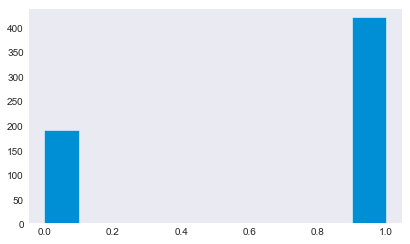

In [11]:
train['Loan_Status'].hist(grid = False)

In [12]:
train['Loan_Status'].skew()

-0.8099980938586473

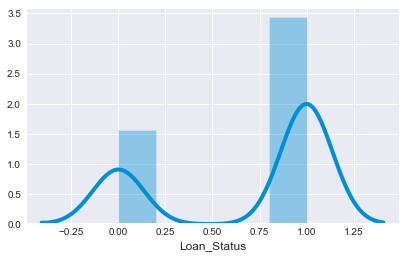

In [13]:
sns.distplot(train['Loan_Status'], hist = True)

### ApplicantIncome

Skew after box cox transformation: 0.478408


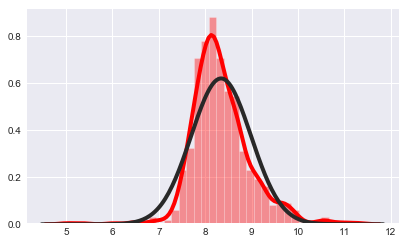

In [30]:
# performing the Box cox transformation using scipy
Box_cox_ApplicantIncome = st.boxcox(train['ApplicantIncome'], lmbda=0)
sns.distplot(Box_cox, fit=norm, color="r")
print("Skew after box cox transformation: %f" % skew(Box_cox_ApplicantIncome))

- **skewness** is **between -0.5 to +0.5** then we can say data is **fairly symmetrical**.

### CoapplicantIncome

In [169]:
# performing the Cube root transformation using numpy
cube_root_CoapplicantIncome = np.cbrt(train['CoapplicantIncome'])
cube_root_CoapplicantIncome.skew()

0.19672586559954766

In [170]:
cube_root_CoapplicantIncome.shape

(614,)

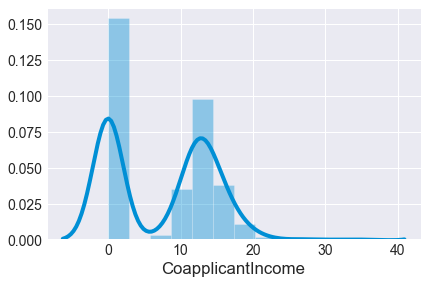

In [171]:
# visualising by density plot
sns.distplot(cube_root_CoapplicantIncome, hist = True)

- **skewness** is **between -0.5 to +0.5** then we can say data is **fairly symmetrical**.

### LoanAmount

Skew after box cox transformation: -0.194878


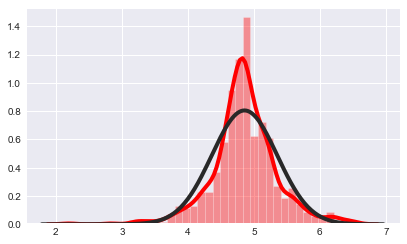

In [23]:
# performing the Box cox transformation using scipy
import scipy.stats as st
from scipy.stats import skew, skewtest, norm
Box_cox = st.boxcox(train['LoanAmount'], lmbda=0)
sns.distplot(Box_cox, fit=norm, color="r")
print("Skew after box cox transformation: %f" % skew(Box_cox))

* **skewness** is **between -1 to -0.5 or 0.5 to 1** then data is **moderately skewed**.

### Loan_Amount_Term

In [174]:
# performing the power transformation using numpy
power_Loan_Amount_Term = np.power(train['Loan_Amount_Term'],3)
power_Loan_Amount_Term.skew()

0.3578884920624611

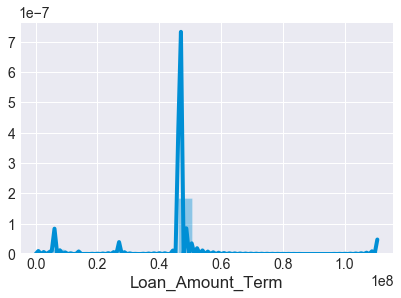

In [175]:
# visualising by density plot
sns.distplot(power_Loan_Amount_Term, hist = True)

**skewness** is **between -0.5 to +0.5** then we can say data is **fairly symmetrical**

### Credit_History

In [176]:
# performing the log transformation using numpy
power_Credit_History = np.power(train['Credit_History'],8)
power_Credit_History.skew()

-1.3865672038794818

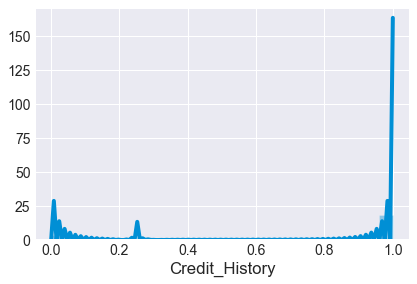

In [177]:
# visualising by density plot
sns.distplot(power_Credit_History, hist = True)

- not much improve

In [31]:
Result_ApplicantIncome = pd.DataFrame(Box_cox_ApplicantIncome)
Result_ApplicantIncome

,0
0,8.674026
1,8.430109
2,8.006368
3,7.856707
4,8.699515
...,...
609,7.972466
610,8.320205
611,8.996157
612,8.933664


In [179]:
Result_CoapplicantIncome = pd.DataFrame(cube_root_CoapplicantIncome)
Result_CoapplicantIncome

,CoapplicantIncome
0,0.000000
1,11.467457
2,0.000000
3,13.310098
4,0.000000
...,...
609,0.000000
610,0.000000
611,6.214465
612,0.000000


In [180]:
Result_LoanAmount = pd.DataFrame(cube_root_LoanAmount)
Result_LoanAmount

,LoanAmount
0,5.039684
1,5.039684
2,4.041240
3,4.932424
4,5.204828
...,...
609,4.140818
610,3.419952
611,6.324704
612,5.718479


In [181]:
Result_Loan_Amount_Term = pd.DataFrame(power_Loan_Amount_Term)
Result_Loan_Amount_Term

,Loan_Amount_Term
0,46656000.0
1,46656000.0
2,46656000.0
3,46656000.0
4,46656000.0
...,...
609,46656000.0
610,5832000.0
611,46656000.0
612,46656000.0


In [182]:
Result_Credit_History = pd.DataFrame(power_Credit_History)
Result_Credit_History

,Credit_History
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
609,1.0
610,1.0
611,1.0
612,1.0


In [183]:
train_skew = pd.concat([Result_ApplicantIncome, Result_CoapplicantIncome, Result_LoanAmount,
                        Result_Loan_Amount_Term, Result_Credit_History], axis=1)
train_skew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,8.674026,0.000000,5.039684,46656000.0,1.0
1,8.430109,11.467457,5.039684,46656000.0,1.0
2,8.006368,0.000000,4.041240,46656000.0,1.0
3,7.856707,13.310098,4.932424,46656000.0,1.0
4,8.699515,0.000000,5.204828,46656000.0,1.0
...,...,...,...,...,...
609,7.972466,0.000000,4.140818,46656000.0,1.0
610,8.320205,0.000000,3.419952,5832000.0,1.0
611,8.996157,6.214465,6.324704,46656000.0,1.0
612,8.933664,0.000000,5.718479,46656000.0,1.0


### Test

In [193]:
numeric_cols_test.skew()

Self_Employed        2.662505
ApplicantIncome      8.441375
CoapplicantIncome    4.257357
LoanAmount           2.243333
Loan_Amount_Term    -2.709537
Credit_History      -1.794114
dtype: float64

### ApplicantIncome

In [194]:
# performing the log transformation using numpy
cube_root_ApplicantIncome = np.cbrt(test['ApplicantIncome'])
cube_root_ApplicantIncome.skew()

1.5055313809952968

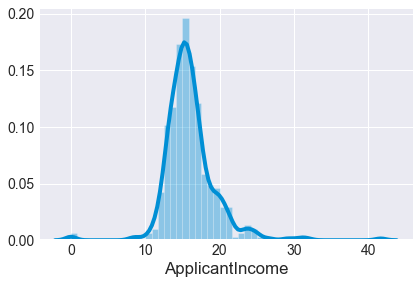

In [195]:
# visualising by density plot
sns.distplot(cube_root_ApplicantIncome, hist = True)

* If the **skewness** is **less than -1 and greater than +1** then our data is **heavily skewed**

### CoapplicantIncome

In [196]:
# performing the log transformation using numpy
cube_root_CoapplicantIncome = np.cbrt(test['CoapplicantIncome'])
cube_root_CoapplicantIncome.skew()

0.08463640851153949

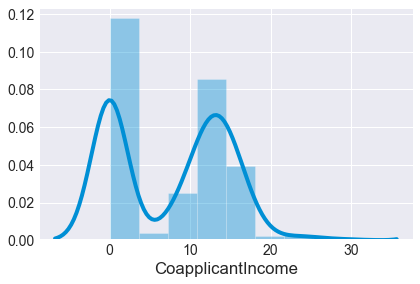

In [197]:
# visualising by density plot
sns.distplot(cube_root_CoapplicantIncome, hist = True)

- **skewness** is **between -0.5 to +0.5** then we can say data is **fairly symmetrical**.

### LoanAmount

In [198]:
# performing the cube root transformation using numpy
cube_root_LoanAmount = np.cbrt(test['LoanAmount'])
cube_root_LoanAmount.skew()

0.5215823154826855

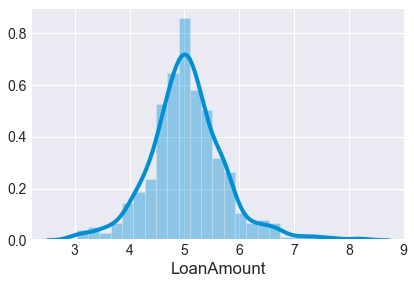

In [199]:
# visualising by density plot
sns.distplot(cube_root_LoanAmount, hist = True)

- **skewness** is **between -1 to -0.5 or 0.5 to 1** then data is **moderately skewed**

### Loan_Amount_Term

In [200]:
# performing the cube root transformation using numpy
power_Loan_Amount_Term = np.power(test['Loan_Amount_Term'],3)
power_Loan_Amount_Term.skew()

0.26863198396707116

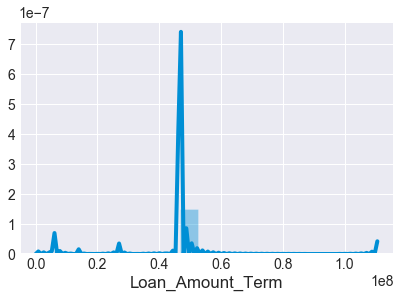

In [201]:
# visualising by density plot
sns.distplot(power_Loan_Amount_Term, hist = True)

- **skewness** is **between -0.5 to +0.5** then we can say data is **fairly symmetrical**

### Credit_History

In [202]:
# performing the power transformation using numpy
power_Credit_History = np.power(test['Credit_History'],9)
power_Credit_History.skew()

-1.2584274723508964

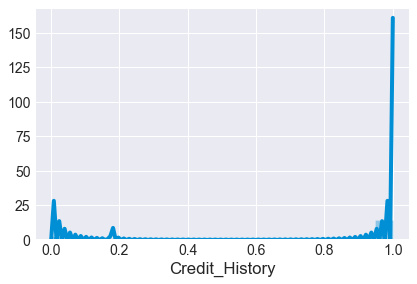

In [203]:
# visualising by density plot
sns.distplot(power_Credit_History, hist = True)

- **skewness** is **less than -1 and greater than +1** then our data is **heavily skewed**

In [204]:
Result_ApplicantIncome_test = pd.DataFrame(cube_root_ApplicantIncome)
Result_ApplicantIncome_test

,ApplicantIncome
0,17.884028
1,14.543271
2,17.099759
3,13.276144
4,14.851875
...,...
362,15.885907
363,16.080325
364,14.812480
365,17.099759


In [205]:
Result_CoapplicantIncome_test = pd.DataFrame(cube_root_CoapplicantIncome)
Result_CoapplicantIncome_test

,CoapplicantIncome
0,0.000000
1,11.447142
2,12.164404
3,13.654825
4,0.000000
...,...
362,12.112370
363,8.916931
364,12.584494
365,13.375630


In [206]:
Result_LoanAmount_test = pd.DataFrame(cube_root_LoanAmount)
Result_LoanAmount_test

,LoanAmount
0,4.791420
1,5.013298
2,5.924992
3,4.641589
4,4.272659
...,...
362,4.834588
363,4.862944
364,5.013298
365,5.406120


In [207]:
Result_Loan_Amount_Term_test = pd.DataFrame(power_Loan_Amount_Term)
Result_Loan_Amount_Term_test

,Loan_Amount_Term
0,46656000.0
1,46656000.0
2,46656000.0
3,46656000.0
4,46656000.0
...,...
362,46656000.0
363,46656000.0
364,46656000.0
365,46656000.0


In [208]:
Result_Credit_History_test = pd.DataFrame(power_Credit_History)
Result_Credit_History_test

,Credit_History
0,1.000000
1,1.000000
2,1.000000
3,0.177905
4,1.000000
...,...
362,1.000000
363,1.000000
364,0.177905
365,1.000000


In [209]:
test_skew = pd.concat([Result_ApplicantIncome_test, Result_CoapplicantIncome_test, Result_LoanAmount_test,
                        Result_Loan_Amount_Term_test, Result_Credit_History_test], axis=1)
test_skew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,17.884028,0.000000,4.791420,46656000.0,1.000000
1,14.543271,11.447142,5.013298,46656000.0,1.000000
2,17.099759,12.164404,5.924992,46656000.0,1.000000
3,13.276144,13.654825,4.641589,46656000.0,0.177905
4,14.851875,0.000000,4.272659,46656000.0,1.000000
...,...,...,...,...,...
362,15.885907,12.112370,4.834588,46656000.0,1.000000
363,16.080325,8.916931,4.862944,46656000.0,1.000000
364,14.812480,12.584494,5.013298,46656000.0,0.177905
365,17.099759,13.375630,5.406120,46656000.0,1.000000


In [210]:
train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'], inplace=True, axis=1)

In [211]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,0.0,Urban,Y
1,Male,Yes,1,Graduate,0.0,Rural,N
2,Male,Yes,0,Graduate,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,0.0,Urban,Y
4,Male,No,0,Graduate,0.0,Urban,Y


In [212]:
train.shape

(614, 7)

In [213]:
test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'], inplace=True, axis=1)

In [214]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,0.0,Urban
1,Male,Yes,1,Graduate,0.0,Urban
2,Male,Yes,2,Graduate,0.0,Urban
3,Male,Yes,2,Graduate,0.0,Urban
4,Male,No,0,Not Graduate,0.0,Urban


In [215]:
test.shape

(367, 6)

<h2 style="color:blue" align="left"> 7. Model building and Evaluation </h2>

### OneHotEncoding

In [231]:
train_new = pd.concat([train, train_skew], axis=1)
train_new.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,1,0.0,2,1,8.674026,0.000000,5.039684,46656000.0,1.0
1,1,1,1,1,0.0,0,0,8.430109,11.467457,5.039684,46656000.0,1.0
2,1,1,0,1,1.0,2,1,8.006368,0.000000,4.041240,46656000.0,1.0
3,1,1,0,0,0.0,2,1,7.856707,13.310098,4.932424,46656000.0,1.0
4,1,0,0,1,0.0,2,1,8.699515,0.000000,5.204828,46656000.0,1.0


In [232]:
test_new = pd.concat([test, test_skew], axis=1)
test_new.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,0,1,0.0,2,17.884028,0.000000,4.791420,46656000.0,1.000000
1,1,1,1,1,0.0,2,14.543271,11.447142,5.013298,46656000.0,1.000000
2,1,1,2,1,0.0,2,17.099759,12.164404,5.924992,46656000.0,1.000000
3,1,1,2,1,0.0,2,13.276144,13.654825,4.641589,46656000.0,0.177905
4,1,0,0,0,0.0,2,14.851875,0.000000,4.272659,46656000.0,1.000000


In [233]:
# Import first 5 rows
display(train_new.head())
display(test_new.head())

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,1,0.0,2,1,8.674026,0.000000,5.039684,46656000.0,1.0
1,1,1,1,1,0.0,0,0,8.430109,11.467457,5.039684,46656000.0,1.0
2,1,1,0,1,1.0,2,1,8.006368,0.000000,4.041240,46656000.0,1.0
3,1,1,0,0,0.0,2,1,7.856707,13.310098,4.932424,46656000.0,1.0
4,1,0,0,1,0.0,2,1,8.699515,0.000000,5.204828,46656000.0,1.0


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,0,1,0.0,2,17.884028,0.000000,4.791420,46656000.0,1.000000
1,1,1,1,1,0.0,2,14.543271,11.447142,5.013298,46656000.0,1.000000
2,1,1,2,1,0.0,2,17.099759,12.164404,5.924992,46656000.0,1.000000
3,1,1,2,1,0.0,2,13.276144,13.654825,4.641589,46656000.0,0.177905
4,1,0,0,0,0.0,2,14.851875,0.000000,4.272659,46656000.0,1.000000


In [234]:
train_new.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed        float64
Property_Area          int64
Loan_Status            int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [235]:
print("Training Data Shape (Rows,Columns):",train_new.shape)
print("Competition Data Shape (Rows,Columns):", test_new.shape)

Training Data Shape (Rows,Columns): (614, 12)
Competition Data Shape (Rows,Columns): (367, 11)


In [236]:
# Independant variable
X = train_new.drop('Loan_Status',axis=1)        # All rows & columns exclude Target features

# Dependant variable
y = train_new['Loan_Status']                   # Only target feature

In [237]:
# split  data into training and testing sets of 80:20 ratio
# 20% of test size selected
# random_state is random seed
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [238]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(491, 11) (123, 11) (491,) (123,)


In [239]:
sc = StandardScaler()
X_train_Scaled = sc.fit_transform(X_train)
X_test_Scaled = sc.transform(X_test)

In [240]:
test_new.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

### 1. Logistic Regression

In [241]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [242]:
y_pred_LogReg = LogReg.predict(X_test)

In [243]:
print("Train Score {:.2f} & Test Score {:.2f}".format(LogReg.score(X_train, y_train), LogReg.score(X_test, y_test)))

Train Score 0.69 & Test Score 0.67


In [244]:
accuracy_score(y_test, y_pred_LogReg)

0.6747967479674797

### 2. Decision Tree

In [245]:
DTR = DecisionTreeClassifier()
DTR.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [246]:
y_pred_DTR = DTR.predict(X_test)

In [247]:
accuracy_score(y_test, y_pred_DTR)

0.6991869918699187

In [248]:
print("Train Score {:.2f} & Test Score {:.2f}".format(DTR.score(X_train, y_train), DTR.score(X_test, y_test)))

Train Score 1.00 & Test Score 0.70


### 3. Random Forest

In [249]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [250]:
pred_rf = rf.predict(X_test)

In [251]:
accuracy_score(y_test, pred_rf )

0.7235772357723578

In [252]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

Train Score 0.99 & Test Score 0.72


In [253]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 

paramgrid = {'max_depth': list(range(1, 20, 2)),
             'n_estimators': list(range(1, 200, 20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=1)

# Fit the grid search model 
grid_search.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [254]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [255]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [256]:
pred_rf = rf.predict(X_test)

In [257]:
accuracy_score(y_test, pred_rf )

0.7886178861788617

In [258]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

Train Score 0.85 & Test Score 0.79


### 4. XGBoost

In [259]:
X_train.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed        float64
Property_Area          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [260]:
train_new['Dependents'] = train_new['Dependents'].astype('int64') 
train_new.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed        float64
Property_Area          int64
Loan_Status            int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [261]:
test_new['Dependents'] = test_new['Dependents'].astype('int64') 
test_new.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed        float64
Property_Area          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [262]:
X_train['Dependents'] = X_train['Dependents'].astype('int64')
X_test['Dependents'] = X_test['Dependents'].astype('int64')
display(X_train.dtypes)
display(X_test.dtypes)

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed        float64
Property_Area          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed        float64
Property_Area          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [263]:
reg_xgb = xgboost.XGBClassifier()
reg_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [264]:
# predicting X_test
y_pred_xgb = reg_xgb.predict(X_test)

In [265]:
print("Train Score {:.2f} & Test Score {:.2f}".format(reg_xgb.score(X_train,y_train),reg_xgb.score(X_test,y_test)))

Train Score 1.00 & Test Score 0.81


In [266]:
accuracy_score(y_test, y_pred_xgb)

0.8130081300813008

In [272]:
classifier = xgboost.XGBClassifier()

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [275]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5,
                                   scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [276]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.25, max_delta_step=0, max_depth=10,
       min_child_weight=7, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [277]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [279]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.25, max_delta_step=0, max_depth=10,
       min_child_weight=7, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [282]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train,cv=10)

In [283]:
score

array([0.74      , 0.72      , 0.84      , 0.85714286, 0.7755102 ,
       0.71428571, 0.85714286, 0.7755102 , 0.70833333, 0.79166667])

In [284]:
score.mean()

0.7779591836734694

In [286]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.25, max_delta_step=0, max_depth=10,
       min_child_weight=7, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [287]:
# predicting X_test
y_pred_xgb = classifier.predict(X_test)

In [288]:
print("Train Score {:.2f} & Test Score {:.2f}".format(classifier.score(X_train,y_train),classifier.score(X_test,y_test)))

Train Score 0.88 & Test Score 0.81


In [289]:
accuracy_score(y_test, y_pred_xgb)

0.8130081300813008

In [290]:
# predicting X_test
y_pred_test = classifier.predict(test_new)

### Submission

In [293]:
submission = pd.read_csv("sample_submission_49d68Cx.csv")

submission['Loan_Status'] = y_pred_test                # filling Loan_Status with predictions
submission['Loan_ID'] = test_original['Loan_ID']       # filling Loan_ID with test Loan_ID

# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBOOST.csv')

In [292]:
submission = pd.DataFrame({'Loan_ID': test_original['Loan_ID'], 'Loan_Status': y_pred_test})
submission.to_csv('Loan.csv', index=False)